<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

### Some of the Packages to be Imported and their uses

- Numpy: For arrays, algebra and Mathematical Calculations.
- Pandas: For Dataframe Manipulation and Statistical calculations such as mean.
- Matplotlib: For ploting normal charts and graphs.
- Seaborn: For scatterplots.
- Plotly: For producing interactive publication-quality graphs.
- Sklearn:  For predictive data analysis
- Statsmodels: For the estimation of many different statistical models, as well as for conducting statistical tests, and statistical data exploration.
- and many more.

In [1]:
import numpy as np
import pandas as pd
import re as regex
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import pairplot
import plotly.express as px
import plotly
from plotly import graph_objs
from statsmodels.graphics.correlation import plot_corr
# plotly configuration
plotly.offline.init_notebook_mode()

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble  import BaggingClassifier, ExtraTreesClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, make_scorer
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score

import nltk
import nltk.downloader
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter
from nltk.util import ngrams
from time import time
import gensim
from wordcloud import WordCloud

import pickle
import json
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')


<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

**Class Description**

- 2 News: the tweet links to factual news about climate change

- 1 Pro: the tweet supports the belief of man-made climate change

- 0 Neutral: the tweet neither supports nor refutes the belief of man-made climate change

- -1 Anti: the tweet does not believe in man-made climate change Variable definitions

In [2]:
df = pd.read_csv('train.csv')
df_test = pd.read_csv('test_with_no_labels.csv')
pd.set_option('display.max_columns', 500)

<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>


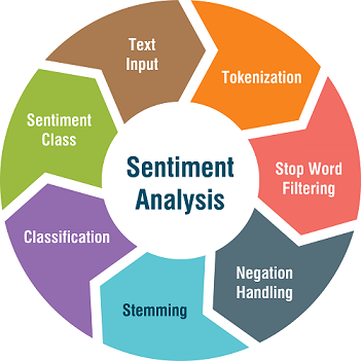

Exploratory Data Analysis (EDA) helps us to understand our data without making any assumptions. It provides context and guidance on the course of action to take when developing the appropriate model. It will also assist in interpreting the results correctly. Without doing EDA it is difficult to understand the data fully.

#### BASIC ANALYSIS

In [3]:
#Investigating the Train data - row and column numbers

df.shape

(15819, 3)

In [4]:
#Investigating the Test data - row and column numbers

df_test.shape

(10546, 2)

In [5]:
# Displaying the first 5 entries of our dataset

df.head()

sentiment                                            message  tweetid
0          1  PolySciMajor EPA chief doesn't think carbon di...   625221
1          1  It's not like we lack evidence of anthropogeni...   126103
2          2  RT @RawStory: Researchers say we have three ye...   698562
3          1  #TodayinMaker# WIRED : 2016 was a pivotal year...   573736
4          1  RT @SoyNovioDeTodas: It's 2016, and a racist, ...   466954

In [6]:
# Displaying the first 5 entries of our dataset

df_test.head()

message  tweetid
0  Europe will now be looking to China to make su...   169760
1  Combine this with the polling of staffers re c...    35326
2  The scary, unimpeachable evidence that climate...   224985
3  @Karoli @morgfair @OsborneInk @dailykos \nPuti...   476263
4  RT @FakeWillMoore: 'Female orgasms cause globa...   872928

#### checking the features(columns) of data

In [7]:
# Here we investigate the data type stored in each column and check for missing values - df_train.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15819 entries, 0 to 15818
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  15819 non-null  int64 
 1   message    15819 non-null  object
 2   tweetid    15819 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 370.9+ KB


In [8]:
# Here we investigate the data type stored in each column and check for missing values - df_test.

df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10546 entries, 0 to 10545
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   message  10546 non-null  object
 1   tweetid  10546 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 164.9+ KB


In [9]:
# showing the exact numbers of each sentiment label.
df.sentiment.value_counts()

 1    8530
 2    3640
 0    2353
-1    1296
Name: sentiment, dtype: int64

#### Univariate Analysis: Non-Graphical

In [10]:
# look at data statistics
df["sentiment"].describe()

count    15819.000000
mean         0.917504
std          0.836537
min         -1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          2.000000
Name: sentiment, dtype: float64

#### Data Visualization

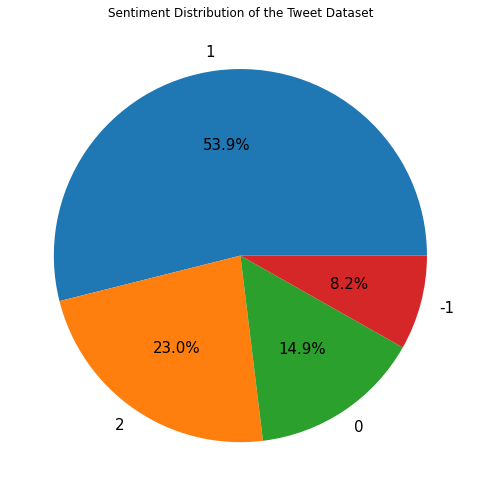

In [11]:
#visualizing the data distribution
plt.figure(figsize = (7, 7))
plt.pie(df.sentiment.value_counts().values, labels = df.sentiment.value_counts().index, autopct = '%2.1f%%', textprops={'fontsize': 15})
plt.title('Sentiment Distribution of the Tweet Dataset', fontsize=12)
plt.tight_layout()
plt.show()

The pie chart shows the distribution of the data. Majority of tweets are labelled as "1" meaning the positive attitude toward the belief that the climate change is caused by the man-kinds, followed by "2"(news), "0"(neutral), and "-1"(anti).

<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

- In the above-given problem statement before training the model, we have performed various pre-processing steps on the dataset that mainly dealt with removing stopwords, removing emojis. The text document is then converted into the lowercase for better generalization.

- The punctuations were cleaned and removed thereby reducing the unnecessary noise from the dataset. After that, we have also removed the repeating characters from the words along with removing the URLs as they do not have any significant importance.

- Lastly, we performed Lemmatization(reducing the derived words to their root form known as lemma) for better results.

Percentage of tweets labeled as an anti sentiment 8.192679688981604%
Percentage of tweets labeled as a neural sentiment 14.87451798470194%
Percentage of tweets labeled as a pro sentiment 53.922498261584174%
Percentage of tweets labeled as a news sentiment 23.010304064732285%


Text(0, 0.5, 'Count')

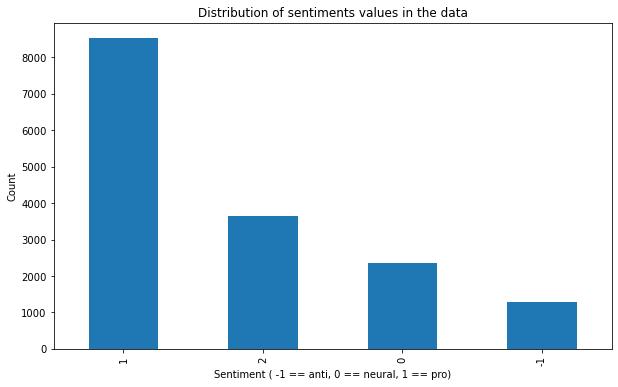

In [12]:
#Printing percentage of tweets with +ve and -ve sentiments
print('Percentage of tweets labeled as an anti sentiment ', end = '')
print(sum(df['sentiment']==-1)*100/df.shape[0], end ='%\n')
print('Percentage of tweets labeled as a neural sentiment ', end = '')
print(sum(df['sentiment']==0)*100/df.shape[0], end ='%\n')
print('Percentage of tweets labeled as a pro sentiment ', end = '')
print(sum(df['sentiment']==1)*100/df.shape[0], end ='%\n')
print('Percentage of tweets labeled as a news sentiment ', end = '')
print(sum(df['sentiment']==2)*100/df.shape[0], end ='%\n')

ax = df['sentiment'].value_counts().plot(kind='bar',
figsize=(10,6),
title='Distribution of sentiments values in the data')
ax.set_xlabel("Sentiment ( -1 == anti, 0 == neural, 1 == pro)")
ax.set_ylabel('Count')

- The bars and the percentage above show that approximately 70% of the tweets are pro whereas 11% and 19% and neural and anti respectively. We can infer that the data is imbalanced and we will use a weighted F1 score to analyze our models.

In [13]:
#Combined data set
combine = pd.concat([df,df_test]).drop_duplicates().reset_index(drop=True)

In [14]:
#expanding the dispay of message column
pd.set_option('display.max_colwidth', -1)
#using only message column
combine[['message']]
combine.tail()

sentiment  \
26360 NaN          
26361 NaN          
26362 NaN          
26363 NaN          
26364 NaN          

                                                                                                                                            message  \
26360  RT @BrittanyBohrer: Brb, writing a poem about climate change. #climatechange #science #poetry #fakenews #alternativefacts https://t.co/RpUs…   
26361  2016: the year climate change came home: During the hottest year on record, Karl Mathiesen travelled to Tasmania… https://t.co/WwSrJQfvMg      
26362  RT @loop_vanuatu: Pacific countries positive about Fiji leading the global climate change conference in November. https://t.co/PIPRndhkYd      
26363  RT @xanria_00018: You’re so hot, you must be the cause for global warming. #ALDUBLaborOfLove @jophie30 @asn585                                 
26364  RT @chloebalaoing: climate change is a global issue that's only getting worse. eating plant based is the least amount of effort that h…        

       tweetid  
26360  895714   
26361  875167   
26362  78329    
26363  867455   
26364  470892

In [15]:
#library that contains punctuation
import string
string.punctuation
#defining the function to remove punctuation
def remove_punctuation(message):
    punctuationfree="".join([i for i in message if i not in string.punctuation])
    return punctuationfree
#storing the puntuation free text
combine['clean_msg']= combine['message'].apply(lambda x:remove_punctuation(x))
#data.head()

In [16]:
## Remove urls
print ('Removing URLs...')
pattern_url = r'http[s]?://(?:[A-Za-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9A-Fa-f][0-9A-Fa-f]))+'
subs_url = r'url-web'
combine['clean_msg']= combine['message'].replace(to_replace = pattern_url, value = subs_url, regex = True)

# Make lower case
print ('Lowering case...')
combine['clean_msg']= combine['message'].str.lower()

Removing URLs...
Lowering case...


Cleaning and removing repeating characters

In [17]:
# utilities
import re
import numpy as np
import pandas as pd
# plotting
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# nltk
from nltk.stem import WordNetLemmatizer
# sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

In [18]:
def cleaning_repeating_char(text):
    return re.sub(r'(.)1+', r'1', text)
combine['text'] = combine['clean_msg'].apply(lambda x: cleaning_repeating_char(x))
combine['text'].tail()

26360    rt @brittanybohrer: brb, writing a poem about climate change. #climatechange #science #poetry #fakenews #alternativefacts https://t.co/rpus…
26361    216: the year climate change came home: during the hottest year on record, karl mathiesen travelled to tasmania… https://t.co/wwsrjqfvmg    
26362    rt @loop_vanuatu: pacific countries positive about fiji leading the global climate change conference in november. https://t.co/piprndhkyd   
26363    rt @xanria_0018: you’re so hot, you must be the cause for global warming. #aldublaboroflove @jophie30 @asn585                               
26364    rt @chloebalaoing: climate change is a global issue that's only getting worse. eating plant based is the least amount of effort that h…     
Name: text, dtype: object

In [19]:
# a fuction to removing emojis from tweets
def decontracted(phrase):
    phrase = phrase.rstrip()
    phrase = ' '.join(phrase.split())
    phrase = re.sub(r'\w+:\/{2}[\d\w-]+(\.[\d\w-]+)*(?:(?:\/[^\s/]*))*', '', phrase)
    phrase = re.sub('@[\w]+','',phrase)
    phrase = re.sub(r'[^\x00-\x7f]',r'', phrase)
    return phrase


In [20]:
#applying fuction to message column
combine['text'] = combine['text'].apply(decontracted)

In [21]:
tweets = combine['text']

Cleaning and removing Numeric numbers

In [22]:
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)
tweets = tweets.apply(lambda x: cleaning_numbers(x))
tweets.tail()

26360    rt : brb, writing a poem about climate change. #climatechange #science #poetry #fakenews #alternativefacts              
26361    : the year climate change came home: during the hottest year on record, karl mathiesen travelled to tasmania            
26362    rt : pacific countries positive about fiji leading the global climate change conference in november.                    
26363    rt : youre so hot, you must be the cause for global warming. #aldublaboroflove                                          
26364    rt : climate change is a global issue that's only getting worse. eating plant based is the least amount of effort that h
Name: text, dtype: object

In [23]:
def cleaning_tweets(data):
    return re.sub("#[A-Za-z0-9_]+","", data)
tweets = tweets.apply(lambda x: cleaning_tweets(x))
tweets.tail()

26360    rt : brb, writing a poem about climate change.                                                                          
26361    : the year climate change came home: during the hottest year on record, karl mathiesen travelled to tasmania            
26362    rt : pacific countries positive about fiji leading the global climate change conference in november.                    
26363    rt : youre so hot, you must be the cause for global warming.                                                            
26364    rt : climate change is a global issue that's only getting worse. eating plant based is the least amount of effort that h
Name: text, dtype: object

Defining set containing all stopwords in English.

In [24]:
stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're','s',
            'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']

Cleaning and removing the above stop words list from the tweet text

Getting tokenization of tweet text

In [25]:
STOPWORDS = set(stopwordlist)
def cleaning_stopwords(tweets):
    return " ".join([word for word in str(tweets).split() if word not in STOPWORDS])
tweets = tweets.apply(lambda tweets: cleaning_stopwords(tweets))
tweets.head()

0    polyscimajor epa chief doesn't think carbon dioxide main cause global warming and.. wait, what!? via
1    it's not like lack evidence anthropogenic global warming                                            
2    rt : researchers say three years act climate change late                                            
3    # wired : pivotal year war climate change                                                           
4    rt : it's , racist, sexist, climate change denying bigot leading polls.                             
Name: text, dtype: object

Applying Lemmatizer

In [26]:
combine['message'] = tweets

In [27]:
#defining function for tokenization
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [28]:
tweets_to_token = tweets
sw = stopwords.words('english') #you can adjust the language as you desire
sw.remove('not') #we exclude not from the stopwords corpus since removing not from the text will change the context of the text
#tweets.head()

In [29]:
for i in range(len(tweets_to_token)):
    tweets_to_token[i] = word_tokenize(tweets_to_token[i])

In [30]:
tweets.head()

0    [polyscimajor, epa, chief, does, n't, think, carbon, dioxide, main, cause, global, warming, and, .., wait, ,, what, !, ?, via]
1    [it, 's, not, like, lack, evidence, anthropogenic, global, warming]                                                           
2    [rt, :, researchers, say, three, years, act, climate, change, late]                                                           
3    [#, wired, :, pivotal, year, war, climate, change]                                                                            
4    [rt, :, it, 's, ,, racist, ,, sexist, ,, climate, change, denying, bigot, leading, polls, .]                                  
Name: text, dtype: object

In [31]:
for i in range(len(tweets_to_token)):
    tweets_to_token[i] = [word for word in tweets_to_token[i] if not word in sw]
    tweets_to_token

In [32]:
tweets.head()

0    [polyscimajor, epa, chief, n't, think, carbon, dioxide, main, cause, global, warming, .., wait, ,, !, ?, via]
1    ['s, not, like, lack, evidence, anthropogenic, global, warming]                                              
2    [rt, :, researchers, say, three, years, act, climate, change, late]                                          
3    [#, wired, :, pivotal, year, war, climate, change]                                                           
4    [rt, :, 's, ,, racist, ,, sexist, ,, climate, change, denying, bigot, leading, polls, .]                     
Name: text, dtype: object

In [33]:
tweets = tweets.apply(lambda x: ' '.join([w for w in x if len(w)>2]))

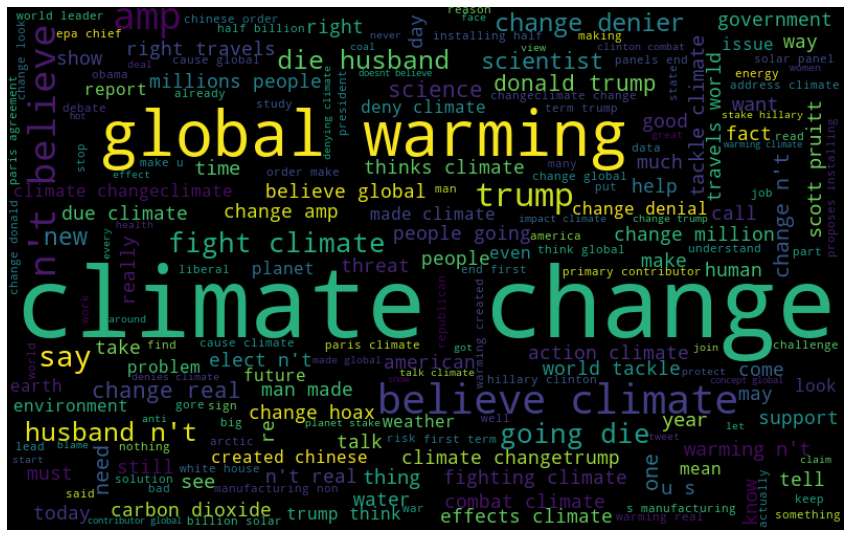

In [34]:
from wordcloud import WordCloud
all_words = ''.join([word for word in tweets])
#building a wordcloud on the data from all tweets
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)
plt.figure(figsize=(15, 15))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

### Lemmatization
- Text Normalization techniques in the field of Natural Language Processing used to prepare text, words, and documents for further processing
- This is done to build common words for the words with similar root and context which makes it easier to model using classification algorithms.
- For our purpose, we will use lemmatization as it brings in common words that are meaningful and thus will be better for sentiment analysis.

In [35]:
# nltk.download(wordnet)
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
wordnet_tokenizer = WordNetLemmatizer()
tweets = tweets.apply(wordnet_tokenizer.lemmatize)

Now, its time to have a look at the top 20 highest occurring words for the anti, neutral, pro and news tweets.

In [36]:
#data.head()
combine['message'] = tweets
#tweets.head()
combine.tail()

sentiment  \
26360 NaN          
26361 NaN          
26362 NaN          
26363 NaN          
26364 NaN          

                                                                                   message  \
26360  brb writing poem climate change                                                       
26361  year climate change came home hottest year record karl mathiesen travelled tasmania   
26362  pacific countries positive fiji leading global climate change conference november     
26363  hot must cause global warming                                                         
26364  climate change global issue getting worse eating plant based least amount effort      

       tweetid  \
26360  895714    
26361  875167    
26362  78329     
26363  867455    
26364  470892    

                                                                                                                                          clean_msg  \
26360  rt @brittanybohrer: brb, writing a poem about climate change. #climatechange #science #poetry #fakenews #alternativefacts https://t.co/rpus…   
26361  2016: the year climate change came home: during the hottest year on record, karl mathiesen travelled to tasmania… https://t.co/wwsrjqfvmg      
26362  rt @loop_vanuatu: pacific countries positive about fiji leading the global climate change conference in november. https://t.co/piprndhkyd      
26363  rt @xanria_00018: you’re so hot, you must be the cause for global warming. #aldublaboroflove @jophie30 @asn585                                 
26364  rt @chloebalaoing: climate change is a global issue that's only getting worse. eating plant based is the least amount of effort that h…        

                                                                                                                           text  
26360  rt : brb, writing a poem about climate change. #climatechange #science #poetry #fakenews #alternativefacts                
26361  216: the year climate change came home: during the hottest year on record, karl mathiesen travelled to tasmania           
26362  rt : pacific countries positive about fiji leading the global climate change conference in november.                      
26363  rt : youre so hot, you must be the cause for global warming. #aldublaboroflove                                            
26364  rt : climate change is a global issue that's only getting worse. eating plant based is the least amount of effort that h

In [37]:
# creating a new dataframe by applying the required 
# conditions in [] 
df_train= combine[combine['sentiment'].notna()]
df_test= combine[combine['sentiment'].isna()]

In [38]:
df_train.tail()

sentiment  \
15814  1.0         
15815  2.0         
15816  0.0         
15817 -1.0         
15818  0.0         

                                                                                  message  \
15814  took material global warming lgbt rights health care 're hocking melania qvc https   
15815  climate change could breaking -million-year-old relationship                         
15816  notiven nytimesworld trump actually believe climate change rick perry joins aides    
15817  hey liberals climate change crap hoax ties climate changed                           
15818  'climate change equation screenshots                                                 

       tweetid  \
15814  22001     
15815  17856     
15816  384248    
15817  819732    
15818  806319    

                                                                                                                                          clean_msg  \
15814  rt @ezlusztig: they took down the material on global warming, lgbt rights, and health care. but now they're hocking melania's qvc. https://…   
15815  rt @washingtonpost: how climate change could be breaking up a 200-million-year-old relationship https://t.co/rpfgvb2plq                        
15816  notiven: rt: nytimesworld :what does trump actually believe about climate change? rick perry joins other aides in … https://t.co/0mp2          
15817  rt @sara8smiles: hey liberals the climate change crap is a hoax that ties to #agenda2030.\nthe climate is being changed byã¢â‚¬â¦              
15818  rt @chet_cannon: .@kurteichenwald's 'climate change equation' in 4 screenshots https://t.co/lp7uufcxdq                                         

                                                                                                                                    text  
15814  rt : they took down the material on global warming, lgbt rights, and health care. but now they're hocking melania's qvc. https://  
15815  rt : how climate change could be breaking up a 200-million-year-old relationship                                                   
15816  notiven: rt: nytimesworld :what does trump actually believe about climate change? rick perry joins other aides in                  
15817  rt : hey liberals the climate change crap is a hoax that ties to #agenda2030. the climate is being changed by                      
15818  rt : .'s 'climate change equation' in 4 screenshots

In [39]:
df_test.tail()

sentiment  \
26360 NaN          
26361 NaN          
26362 NaN          
26363 NaN          
26364 NaN          

                                                                                   message  \
26360  brb writing poem climate change                                                       
26361  year climate change came home hottest year record karl mathiesen travelled tasmania   
26362  pacific countries positive fiji leading global climate change conference november     
26363  hot must cause global warming                                                         
26364  climate change global issue getting worse eating plant based least amount effort      

       tweetid  \
26360  895714    
26361  875167    
26362  78329     
26363  867455    
26364  470892    

                                                                                                                                          clean_msg  \
26360  rt @brittanybohrer: brb, writing a poem about climate change. #climatechange #science #poetry #fakenews #alternativefacts https://t.co/rpus…   
26361  2016: the year climate change came home: during the hottest year on record, karl mathiesen travelled to tasmania… https://t.co/wwsrjqfvmg      
26362  rt @loop_vanuatu: pacific countries positive about fiji leading the global climate change conference in november. https://t.co/piprndhkyd      
26363  rt @xanria_00018: you’re so hot, you must be the cause for global warming. #aldublaboroflove @jophie30 @asn585                                 
26364  rt @chloebalaoing: climate change is a global issue that's only getting worse. eating plant based is the least amount of effort that h…        

                                                                                                                           text  
26360  rt : brb, writing a poem about climate change. #climatechange #science #poetry #fakenews #alternativefacts                
26361  216: the year climate change came home: during the hottest year on record, karl mathiesen travelled to tasmania           
26362  rt : pacific countries positive about fiji leading the global climate change conference in november.                      
26363  rt : youre so hot, you must be the cause for global warming. #aldublaboroflove                                            
26364  rt : climate change is a global issue that's only getting worse. eating plant based is the least amount of effort that h

In [40]:
df_test1 = df_test.drop(["sentiment"], axis = 1)

In [41]:
df_test = df_test1
df_test.head()

message  \
15819  europe looking china make sure not alone fighting climate change      
15820  combine polling staffers climate change womens rights fascist state   
15821  scary unimpeachable evidence climate change already                   
15822  putin got jill trump n't believe climate change thinks hoax           
15823  'female orgasms cause global warming -sarcastic republican            

       tweetid  \
15819  169760    
15820  35326     
15821  224985    
15822  476263    
15823  872928    

                                                                                                                                         clean_msg  \
15819  europe will now be looking to china to make sure that it is not alone in fighting climate change… https://t.co/o7t8rcgwdq                     
15820  combine this with the polling of staffers re climate change and womens' rights and you have a fascist state. https://t.co/ifrm7eexpj          
15821  the scary, unimpeachable evidence that climate change is already here: https://t.co/yaedqcv9ki #itstimetochange #climatechange @zeroco2_;..   
15822  @karoli @morgfair @osborneink @dailykos \nputin got to you too jill ! \ntrump doesn't believe in climate change at all \nthinks it's s hoax   
15823  rt @fakewillmoore: 'female orgasms cause global warming!'\n-sarcastic republican                                                              

                                                                                                                text  
15819  europe will now be looking to china to make sure that it is not alone in fighting climate change               
15820  combine this with the polling of staffers re climate change and womens' rights and you have a fascist state.   
15821  the scary, unimpeachable evidence that climate change is already here:  #itstimetochange #climatechange ;..    
15822      putin got to you too jill ! trump doesn't believe in climate change at all thinks it's s hoax              
15823  rt : 'female orgasms cause global warming!' -sarcastic republican

#### Looking at the top wrods for each sentiment label.

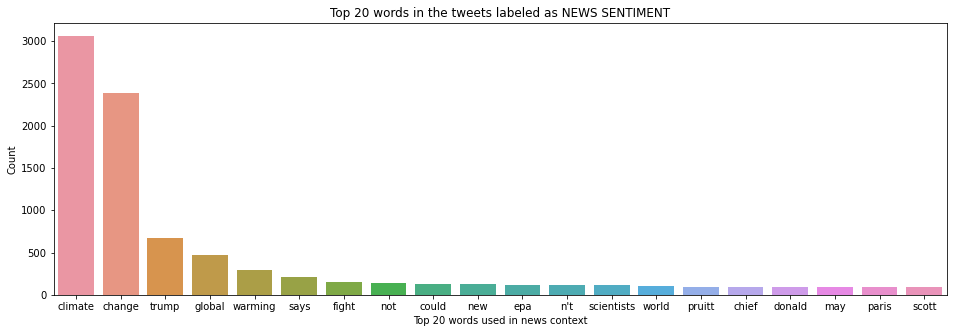

In [42]:
news = df_train[df_train['sentiment'] == 2]
pro = df_train[df_train['sentiment'] == 1]
neutral = df_train[df_train['sentiment'] == 0]
anti = df_train[df_train['sentiment'] == -1]
news_sentiment_words = ''.join([word for word in news['message']]) #words from the tweets that are news
pro_sentiment_words = ''.join([word for word in pro['message']]) #words from the tweets that are pro
neutral_sentiment_words = ''.join([word for word in neutral['message']]) #words from the tweets that are neutral
anti_sentiment_words = ''.join([word for word in anti['message']]) ##words from the tweets that are anti
#top 20 words on news tweets
list_news_words = [ x for x in news_sentiment_words.split()] #list of positive sentiment words
freq_dis_news = nltk.FreqDist(list_news_words) #number of occurances of each word
freq_dataframe = pd.DataFrame({'Words': list(freq_dis_news.keys()), 'Count': list(freq_dis_news.values())}) #data frame of words and count
# selecting top 20 most frequent hashtags
freq_dataframe = freq_dataframe.nlargest(columns='Count', n = 20)
plt.figure(figsize=(16,5))
ax = sns.barplot(data=freq_dataframe, x= 'Words', y = 'Count')
ax.set(ylabel = 'Count')
ax.set(xlabel = 'Top 20 words used in news context')
plt.title('Top 20 words in the tweets labeled as NEWS SENTIMENT')
plt.show()

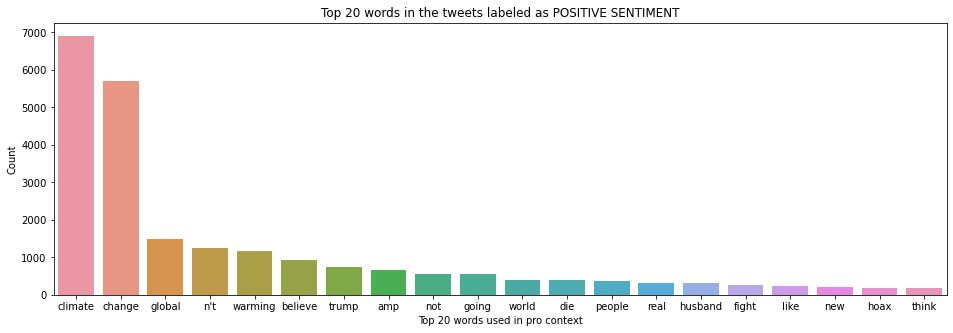

In [43]:
#top 20 words on pro tweets
list_pro_words = [ x for x in pro_sentiment_words.split()] #list of positive sentiment words
freq_dis_pro = nltk.FreqDist(list_pro_words) #number of occurances of each word
freq_dataframe = pd.DataFrame({'Words': list(freq_dis_pro.keys()), 'Count': list(freq_dis_pro.values())}) #data frame of words and count
# selecting top 20 most frequent hashtags
freq_dataframe = freq_dataframe.nlargest(columns='Count', n = 20)
plt.figure(figsize=(16,5))
ax = sns.barplot(data=freq_dataframe, x= 'Words', y = 'Count')
ax.set(ylabel = 'Count')
ax.set(xlabel = 'Top 20 words used in pro context')
plt.title('Top 20 words in the tweets labeled as POSITIVE SENTIMENT')
plt.show()

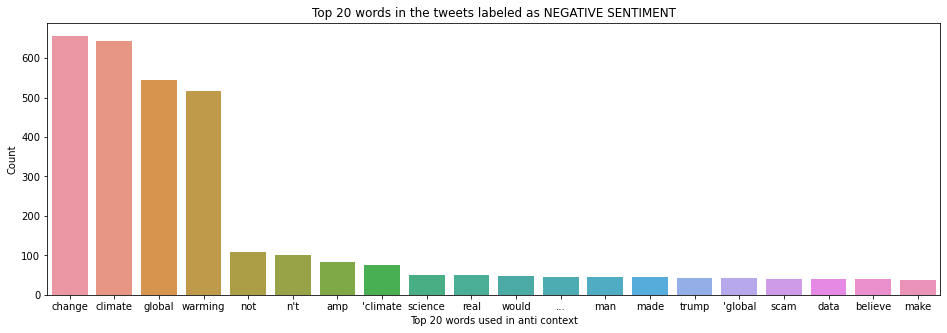

In [44]:
#top 20 words on negative tweets
list_anti_words = [ x for x in anti_sentiment_words.split()]   #list of negative sentiment words
freq_dis_anti = nltk.FreqDist(list_anti_words)   #number of occurances of each word
freq_dataframe = pd.DataFrame({'Words': list(freq_dis_anti.keys()), 'Count': list(freq_dis_anti.values())})  #data frame of words and count
# selecting top 20 most frequent hashtags
freq_dataframe = freq_dataframe.nlargest(columns="Count", n = 20)
plt.figure(figsize=(16,5))
ax = sns.barplot(data=freq_dataframe, x= "Words", y = "Count")
ax.set(ylabel = 'Count')
ax.set(xlabel = 'Top 20 words used in anti context')
plt.title("Top 20 words in the tweets labeled as NEGATIVE SENTIMENT")
plt.show()

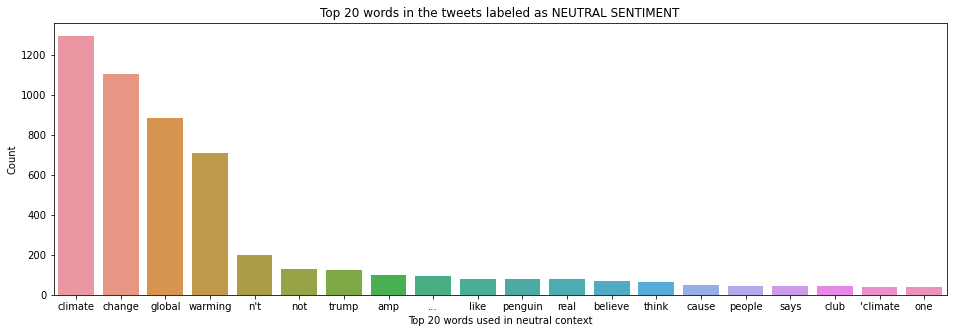

In [45]:
#top 20 words on neutral tweets
list_neutral_words = [ x for x in neutral_sentiment_words.split()]   #list of neutral sentiment words
freq_dis_neutral = nltk.FreqDist(list_neutral_words)   #number of occurances of each word
freq_dataframe = pd.DataFrame({'Words': list(freq_dis_neutral.keys()), 'Count': list(freq_dis_neutral.values())})  #data frame of words and count
# selecting top 20 most frequent hashtags
freq_dataframe = freq_dataframe.nlargest(columns="Count", n = 20)
plt.figure(figsize=(16,5))
ax = sns.barplot(data=freq_dataframe, x= "Words", y = "Count")
ax.set(ylabel = 'Count')
ax.set(xlabel = 'Top 20 words used in neutral context')
plt.title("Top 20 words in the tweets labeled as NEUTRAL SENTIMENT")
plt.show()

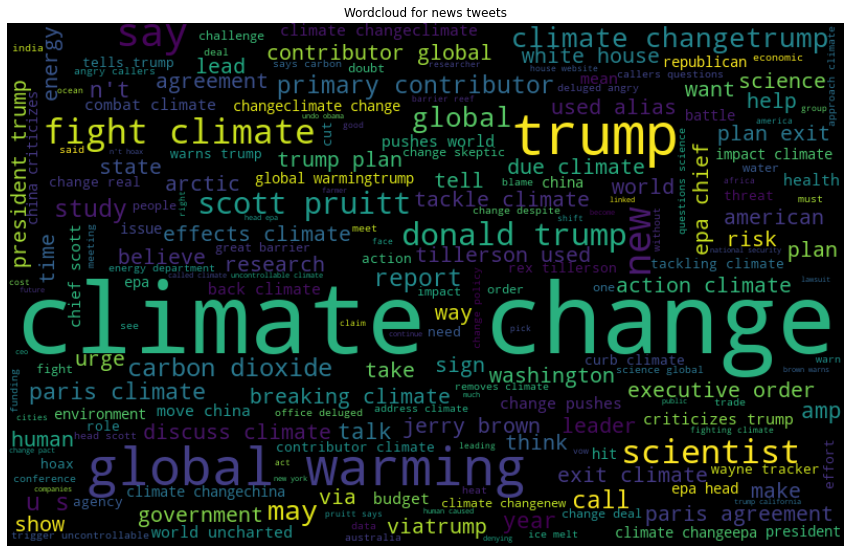

In [46]:
# Let us also look into the WordClouds for newss, pro, nuetral and anti tweets.

#WordCloud for news tweets
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(news_sentiment_words)
plt.figure(figsize=(15, 15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Wordcloud for news tweets')
plt.show()

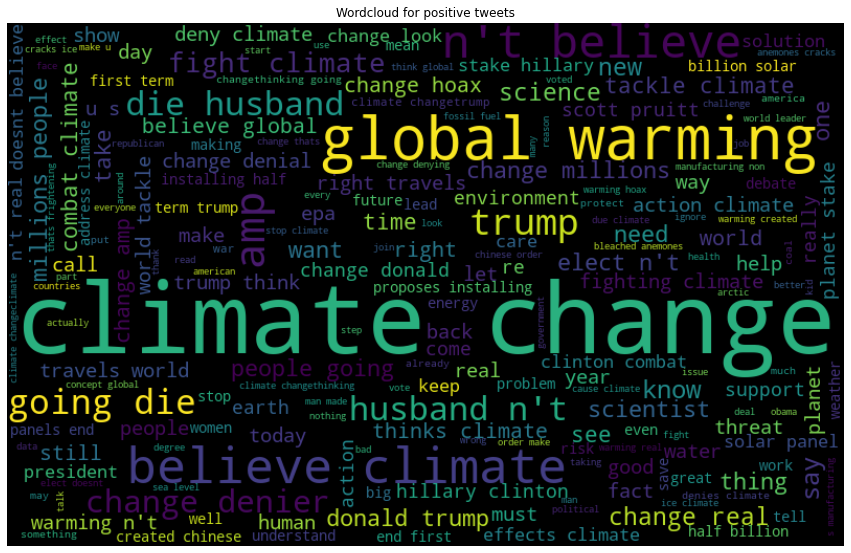

In [47]:
#WordCloud for positive tweets
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(pro_sentiment_words)
plt.figure(figsize=(15, 15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Wordcloud for positive tweets')
plt.show()

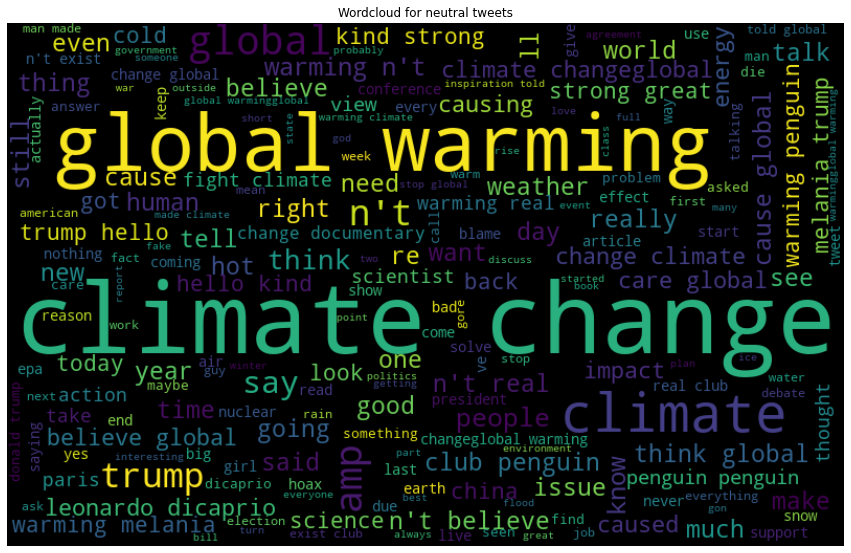

In [48]:
#WordCloud for neutral tweets
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(neutral_sentiment_words)
plt.figure(figsize=(15, 15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Wordcloud for neutral tweets')
plt.show()

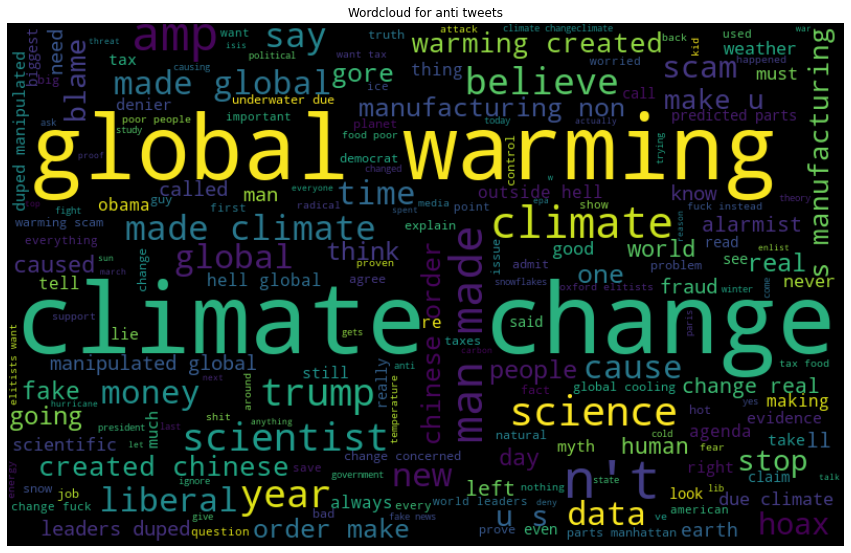

In [49]:
#wordcloud for anti tweets
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(anti_sentiment_words)
plt.figure(figsize=(15, 15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Wordcloud for anti tweets')
plt.show()

- From the above bar graphs and WordClouds, we can see that some of the words in the negative tweets are fight climate, don't, change hoax, realdonaldtrump, doesnt believe, etc whereas some of the words used in positive tweets are believe global, impact, well, fact, environment, people, etc.

#### Checking for Class Imbalance

In [50]:
# Converting our data set to array for use
data=df_train[['message','sentiment']]

In [51]:
# Confirm the conversion
data['sentiment'].unique()

array([ 1.,  2.,  0., -1.])

In [52]:
# importing the module and creating a resampling variable
from sklearn.utils import resample
class_size = int(len(df_train[df_train['sentiment']==1]))

#### Random over-sampling with imblearn
- One way to fight imbalance data is to generate new samples in the minority classes.
- The most naive strategy is to generate new samples by randomly sampling with replacement of the currently available samples. The RandomOverSampler offers such a scheme

In [53]:
# class count
class_0, class_1, class_2, class_3 = data['sentiment'].value_counts()

# Separate class
class_0 = data[data['sentiment'] == -1]
class_1 = data[data['sentiment'] == 0]
class_2 = data[data['sentiment'] == 1]
class_3 = data[data['sentiment'] == 2]
print('sentiment -1:', class_0.shape)
print('sentiment 0:', class_1.shape)
print('sentiment 1:', class_2.shape)
print('sentiment 2:', class_3.shape)

sentiment -1: (1296, 2)
sentiment 0: (2353, 2)
sentiment 1: (8530, 2)
sentiment 2: (3640, 2)


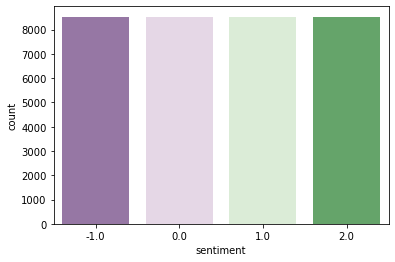

In [54]:
# upsampling classes
class_0_ups = resample(class_0,replace=True,n_samples=class_size, random_state=27)
class_1_ups = resample(class_1,replace=True,n_samples=class_size, random_state=27)
class_3_ups = resample(class_3,replace=True,n_samples=class_size, random_state=27)
class_2_downs = resample(class_2,replace=False,n_samples=class_size, random_state=27)

# Creating a new DataFrame out of the balanced bata
resample_df = pd.concat([class_0_ups, class_1_ups, class_3_ups,class_2_downs])

# Plotting our result to confirm data balancing
sns.countplot(x = resample_df['sentiment'], data = data, palette='PRGn')
plt.show()

In [55]:
## Converting our data set to array for use
data=resample_df[['message','sentiment']]

In [56]:
# Renaming the sentiment labels
data_pro = data[data['sentiment'] == 1]
data_neutral = data[data['sentiment'] == 0]
data_anti = data[data['sentiment'] == -1]
data_news = data[data['sentiment'] == 2]

In [57]:
# Putting the sentiment labels together, ready for use
dataset = pd.concat([data_news, data_pro, data_neutral, data_anti])

In [58]:
#data.head()

In [59]:
df_train = data.join(df_train['tweetid'])

In [60]:
df_train.head()

message  \
0  polyscimajor epa chief n't think carbon dioxide main cause global warming wait via   
1  not like lack evidence anthropogenic global warming                                  
3  wired pivotal year war climate change                                                
4  racist sexist climate change denying bigot leading polls                             
5  worth read whether n't believe climate change                                        

   sentiment  tweetid  
0  1.0        625221   
1  1.0        126103   
3  1.0        573736   
4  1.0        466954   
5  1.0        425577

In [61]:
df_train['sentiment'] = df['sentiment'].apply(np.int64)

In [62]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34120 entries, 0 to 15818
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   message    34120 non-null  object
 1   sentiment  34120 non-null  int64 
 2   tweetid    34120 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.0+ MB


In [63]:
# sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

In [64]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df_train['message']).toarray()
df_new = pd.DataFrame(X, columns=vectorizer.get_feature_names())
print(df_new.shape)

X_testss = vectorizer.transform(df_test['message']).toarray()
df_testnew = pd.DataFrame(X_testss, columns=vectorizer.get_feature_names())
print(df_testnew.shape)

(34120, 13886)
(10546, 13886)


- We will now use train_test_split to create new training and test set to get the best model. We can then use the best model on our original test set to get the F1 score.

In [65]:
X = df_new.values
y = df_train.sentiment.values

In [66]:
# Separating the 80% data for training data and 20% for testing data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20, random_state =42)

### Kaggle Submission

In [67]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10546 entries, 15819 to 26364
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   message    10546 non-null  object
 1   tweetid    10546 non-null  int64 
 2   clean_msg  10546 non-null  object
 3   text       10546 non-null  object
dtypes: int64(1), object(3)
memory usage: 412.0+ KB


In [68]:
from sklearn.ensemble import RandomForestClassifier
rfm = RandomForestClassifier()
rfm.fit(X_train, y_train)
rfm_pred1a = rfm.predict(X_test)
print(f1_score(y_test, rfm_pred1a, pos_label = 'positive', average='micro'))

0.9274618991793669


In [69]:
rfm.fit(X,y)
rfm_test = df_testnew.values
rfm_pred1a = rfm.predict(rfm_test)

In [70]:
# Preparing submission
submission_rfm = pd.DataFrame()
submission_rfm['tweetid'] = df_test['tweetid']
submission_rfm['sentiment'] = rfm_pred1a
submission_rfm.to_csv('sub_rfm.csv', index=False)

In [77]:
from sklearn.naive_bayes import MultinomialNB
nbs = MultinomialNB()
nbs.fit(X_train, y_train)
nbs_pred9 = nbs.predict(X_test)
print(f1_score(y_test, nbs_pred9, pos_label = 'positive', average='micro'))

0.6618204804045512


In [78]:
nbs.fit(X,y)
nbs_test = df_testnew.values
nbs_pred9b = nbs.predict(nbs_test)

In [79]:
# Preparing submission
submission_nbs = pd.DataFrame()
submission_nbs['tweetid'] = df_test['tweetid']
submission_nbs['sentiment'] = nbs_pred9b
submission_nbs.to_csv('sub_nbs.csv', index=False)

<a id="six"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

- Now, that we have cleaned our data and gained a brief view through the WordClouds, we will prepare the data for modelling. Preparation of text data involves converting into some numeric format which the machine learning models can understand. The computers only understand numerical data and therefore this is necessary.

- Generally, there are various ways to convert text data into numeric form like CountVectorizer, TfIdf, etc. Count Vectorizer is based on the bag of words model. It works by counting the words’ frequencies in each document (each tweet in this case).

- With TfIdf( Term Frequency–Inverse Document Frequency), the numeric values increase with the increase in the count of the words but are offset by the occurrence of the same word in the different corpus. For example, if there is a word ‘apple’ with many occurrences in a document with its presence in about 80% of the tweets, count vectorizer will give a high value for apple but TfIdf will have a negligible value because it is a common word occurring in many documents and therefore isn’t a useful word to classify the documents(or tweets here).

- In this case, we will use TfIdf.

### Function For Model Evaluation

- After training the model we then apply the evaluation measures to check how the model is performing. Accordingly, we use the following evaluation parameters to check the performance of the models respectively :

- Accuracy Score
- Confusion Matrix with Plot

In [71]:
def model_Evaluate(model):
# Predict values for Test dataset
    y_pred = model.predict(X_test)
# Print the evaluation metrics for the dataset.
    print(classification_report(y_test, y_pred))
# Compute and plot the Confusion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)
    print(cm)
 # Show confusion matrix with colored background.
    Index = ['Actual -1', 'Actual 0', 'Actual 1', 'Actual 2', ]
    Cols = ['Pred -1', 'Pred 0', 'Pred 1', 'Pred 2']
    df = pd.DataFrame(cm, index=Index, columns=Cols)
    plt.figure(figsize=(12, 12))

    ax = sns.heatmap(df, cmap='Blues', annot=True, fmt='g')
    bottom, top = ax.get_ylim()
    ax.set(title="Confusion Matrix")
    ax.set_ylim(bottom + 0.5, top - 0.5)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=30,
                       horizontalalignment='right')
    ax.set_yticklabels(ax.get_yticklabels(), rotation=0,
                       horizontalalignment='right')


### Model Building
- In the problem statement we have used five different models respectively :

- Random Forest
- Support Vector Machine
- Logistic Regression
- Naive Bayes
- Stochastic Gradient Descent
- Naive Bayes - Multinomial was also used with Redial Function Basis (RBF sample) to improve the model

The idea behind choosing these models is that we want to try all the classifiers on the dataset ranging from simple ones to complex models and then try to find out the one which gives the best performance among them.

In [72]:
# utilities
import re
import numpy as np
import pandas as pd
# plotting
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# nltk
from nltk.stem import WordNetLemmatizer
# sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

### Model 1 - Random Forest

- A meta-estimator that fits a number of decision trees on various sub-samples of datasets and uses average to improve the predictive accuracy of the model and controls over-fitting. The sub-sample size is always the same as the original input sample size but the samples are drawn with replacement.

- Reduction in over-fitting and its more accurate than decision trees in most cases.

              precision    recall  f1-score   support

          -1       0.98      0.99      0.99      1745
           0       0.90      0.96      0.93      1668
           1       0.92      0.79      0.85      1693
           2       0.90      0.96      0.93      1718

    accuracy                           0.93      6824
   macro avg       0.93      0.93      0.92      6824
weighted avg       0.93      0.93      0.92      6824

[[1733    8    4    0]
 [   4 1608   48    8]
 [  28  159 1331  175]
 [   4    9   57 1648]]


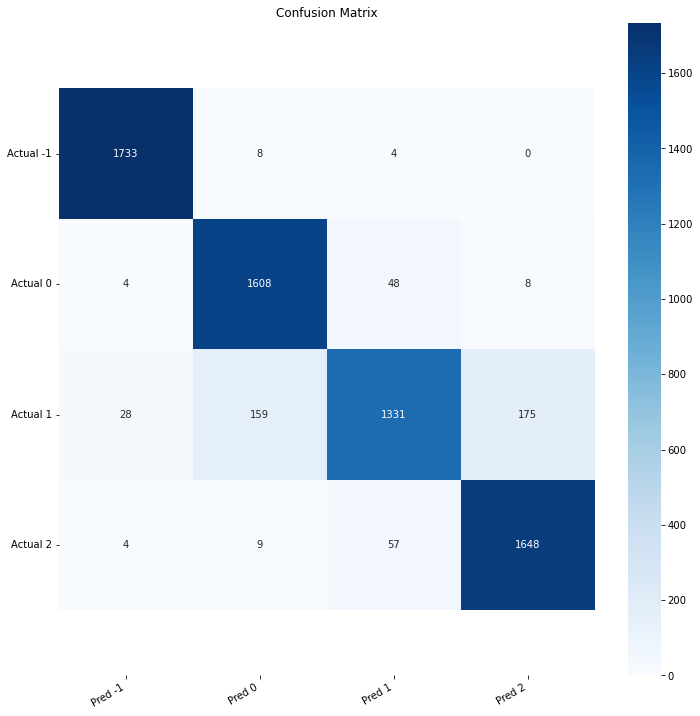

In [80]:
from sklearn.ensemble import RandomForestClassifier
rfm = RandomForestClassifier()
rfm.fit(X_train, y_train)
model_Evaluate(rfm)
y_pred1 = rfm.predict(X_test)

### Model 2 -  Support Vector Machine (SVM)

- Support vector machine is a representation of the training data as points in space separated into categories by a clear gap that is as wide as possible. New examples are then mapped into that same space and predicted to belong to a category based on which side of the gap they fall.

- Effective in high dimensional spaces and uses a subset of training points in the decision function so it is also memory efficient.

              precision    recall  f1-score   support

          -1       0.94      0.99      0.96      1745
           0       0.86      0.92      0.89      1668
           1       0.88      0.72      0.79      1693
           2       0.88      0.94      0.91      1718

    accuracy                           0.89      6824
   macro avg       0.89      0.89      0.89      6824
weighted avg       0.89      0.89      0.89      6824

[[1720   12   11    2]
 [  22 1536   86   24]
 [  84  210 1213  186]
 [  13   22   65 1618]]


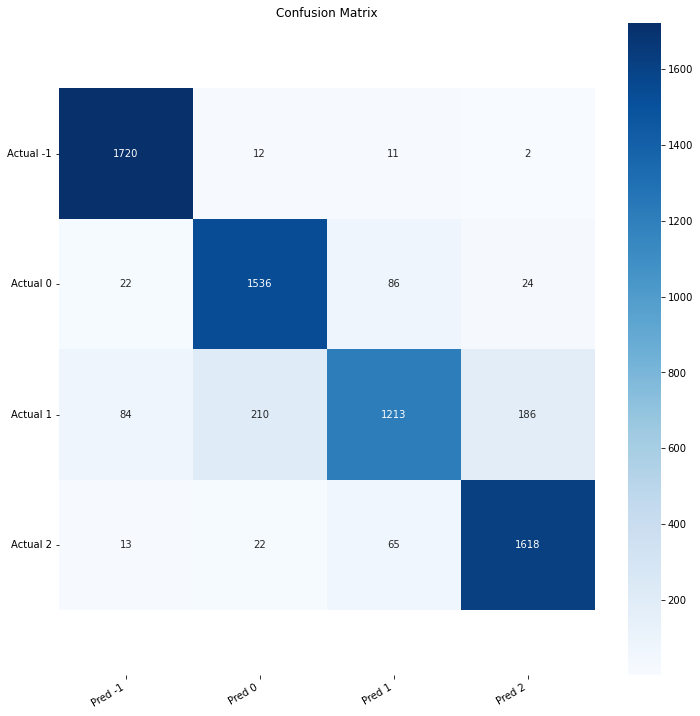

In [78]:
SVCmodel = LinearSVC()
SVCmodel.fit(X_train, y_train)
model_Evaluate(SVCmodel)
y_pred2 = SVCmodel.predict(X_test)

### Model 3 - Logistic Regression

- In this algorithm, the probabilities describing the possible outcomes of a single trial are modelled using a logistic function.

- Designed for this purpose (classification), and is most useful for understanding the influence of several independent variables on a single outcome variable.

              precision    recall  f1-score   support

          -1       0.91      0.96      0.93      1745
           0       0.84      0.86      0.85      1668
           1       0.82      0.70      0.76      1693
           2       0.85      0.90      0.87      1718

    accuracy                           0.86      6824
   macro avg       0.85      0.85      0.85      6824
weighted avg       0.85      0.86      0.85      6824

[[1668   29   35   13]
 [  44 1433  129   62]
 [  91  208 1185  209]
 [  30   45   93 1550]]


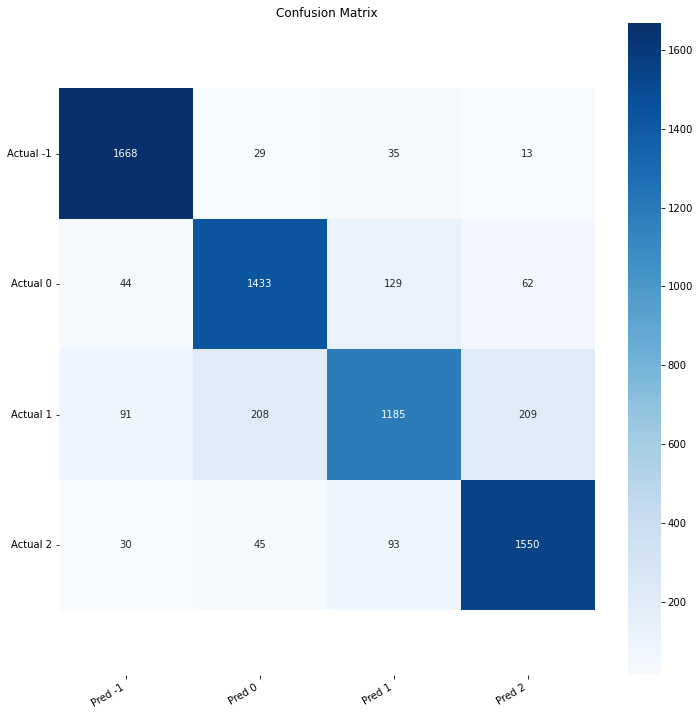

In [76]:
LRmodel = LogisticRegression()
LRmodel.fit(X_train, y_train)
model_Evaluate(LRmodel)
y_pred3 = LRmodel.predict(X_test)

### Model 4  -  Naive Bayes

- Naive Bayes algorithm based on Bayes’ theorem with the assumption of independence between every pair of features. Naive Bayes classifiers work well in many real-world situations such as document classification and spam filtering.

- Requires a small amount of training data to estimate the necessary parameters. Naive Bayes classifiers are extremely fast compared to more sophisticated methods.

              precision    recall  f1-score   support

          -1       0.82      0.94      0.88      1745
           0       0.82      0.76      0.79      1668
           1       0.77      0.63      0.69      1693
           2       0.80      0.88      0.84      1718

    accuracy                           0.80      6824
   macro avg       0.80      0.80      0.80      6824
weighted avg       0.80      0.80      0.80      6824

[[1639   42   41   23]
 [ 135 1266  160  107]
 [ 174  198 1067  254]
 [  43   32  125 1518]]


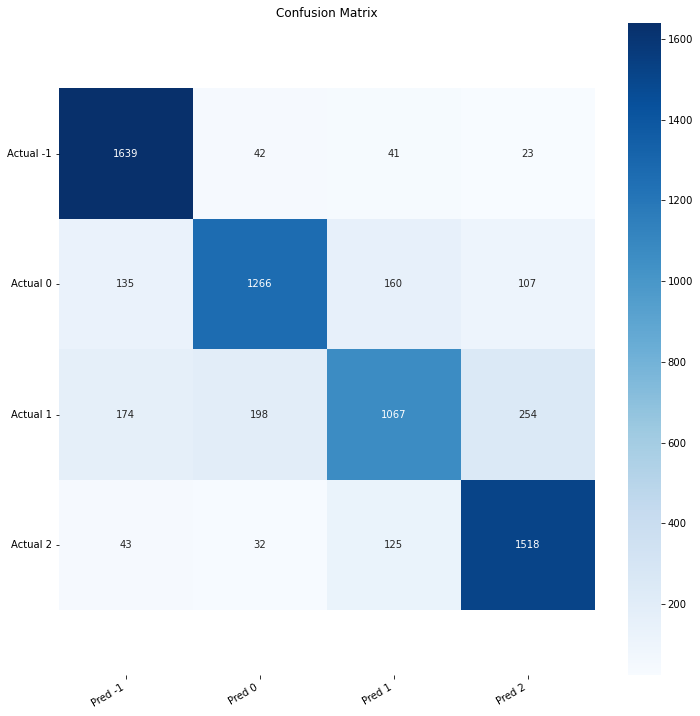

In [84]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train, y_train)
model_Evaluate(nb)
y_predict = nb.predict(X_test)

### Model 5 - Stochastic Gradient Descent (SGD)

- Simple and very efficient approach to fit linear models. It is particularly useful when the number of samples is very large.
- It supports different loss functions and penalties for classification. It is efficiency and ease of implementation.

              precision    recall  f1-score   support

          -1       0.89      0.94      0.92      1745
           0       0.80      0.85      0.82      1668
           1       0.83      0.63      0.71      1693
           2       0.82      0.91      0.86      1718

    accuracy                           0.83      6824
   macro avg       0.83      0.83      0.83      6824
weighted avg       0.83      0.83      0.83      6824

[[1649   53   31   12]
 [  59 1415  123   71]
 [ 113  254 1066  260]
 [  36   51   72 1559]]


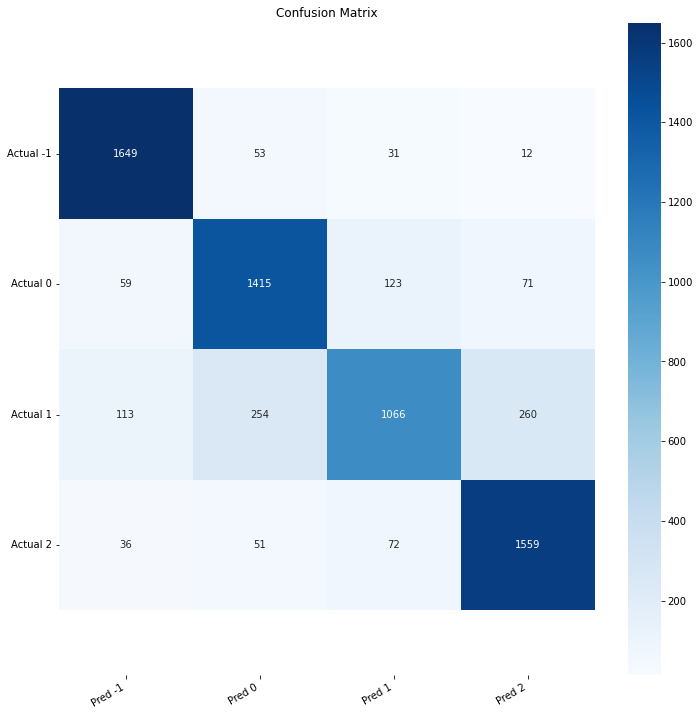

In [75]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier () #loss = 'modified_huber', shuffle=True, random_state=101)
sgd.fit(X_train, y_train)
model_Evaluate(sgd)
y_pred5 = sgd.predict(X_test)


In [61]:
y_pred2b = SVCmodel.predict(X_testss)

- Now, we will try three models — Logistic Regression ( with hyperparameters tuning ), Support Vector Machine ( SVM ) and Naive Bayes Classifier’s MultinomialNB and look for the best model that we can use for our test set.

- The weighted F1 score from Logistic Regression with the best hyperparameters is 0.8200 which seem to be pretty good.

**F1 score**
- In statistical analysis of binary classification, the (also F-score or F-measure) is a measure of a test's accuracy. 

- Weighted F1 score is the weighted average score of F1 scores for sentiment `-1`, `0`, `1` and sentiment `2` which we can see from the above classification report.

- SVC gives us a weighted F1 score of 0.84 which is a bit better than Logistic Regression.

<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

- The primary objective of model comparison and selection is definitely better performance of the machine learning software/solution. The objective is to narrow down on the best algorithms that suit both the data and the business requirements.

- Now, that we have got the best model, we can use the model on the preprocessed test data which is stored as tfidf_test to predict their sentiments.

In [85]:
LRmodel_score = metrics.accuracy_score(y_pred3, y_test)
SVCmodel_score = metrics.accuracy_score(y_pred2, y_test)
rfm_score = metrics.accuracy_score(y_pred1, y_test)
sgd_score = metrics.accuracy_score(y_pred5, y_test)
nb_score = metrics.accuracy_score(y_predict, y_test)

In [86]:
F1_scores = {
    'Models' : ['Logistic Regression', 'SVC', 'Random Forest', 'SGD', 'Naive Bayes'],
    'F1_Score' : [LR_score,SVC_score,RF_score,SGD_score,NB_score]
}
  
# creating a Dataframe object 
f1_df = pd.DataFrame(F1_scores)
f1_df

Models  F1_Score
0  Logistic Regression  0.855217
1  SVC                  0.891999
2  Random Forest        0.926143
3  SGD                  0.833675
4  Naive Bayes          0.804513

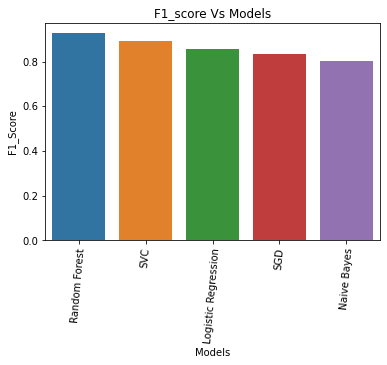

In [88]:
sns.barplot(x= f1_df['Models'], y = f1_df['F1_Score'],data=f1_df,order=f1_df.sort_values('F1_Score',ascending = False).Models) 


plt.title('F1_score Vs Models')
plt.xticks(rotation=85)
plt.show()


From the graph above, we can see that Random Forest  perform the best with good metric score closely followed by Linear SVC, and Logistic regression. Naive Bayes performed the worst. 

They are  few questions concerning our modeling problems:

 - There are still a few more models we would have tested for better result e.g.KNN with high settings. Should we try more models?
 - Naive Bayes performed the worst but was actually the faster execution time.  Should execution time and memory consumption be considered?
 - The scores looks good but are they the best? should we improve on the current techniques using hyperparameter tunning?

In [62]:
results_dict=pd.DataFrame({'tweetid':df_test['tweetid'],
                          'sentiment': y_pred2b}
results_dict.to_csv('submission_svm.csv', index = False)

In [69]:
# Choose best model and motivate why it is the best choice

<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

Obviously we can see that there are a lot of questions, and this list isn't even complete! But don't let that intimidate you; part of becoming a competent data scientist is knowing which of these questions is most pertinent for the task you are required to complete. It is something which will take practice and the application of your very capable mind!  


In [70]:
# discuss chosen methods logic


## Conclusion


- Whether you are launching a new feature on your platform, a site redesign, or a new marketing campaign, you may want to track customer reactions on Twitter.

- Taking action and making changes or improvements in real-time will help maintain customer loyalty, and can even help spread the word about your new feature.

- From people's reaction on Tweet, we advice the company go ahead as people respond favourably to climate change issues.

In [87]:
#experiment.end()